In [1]:
import numpy as np
import h5py as h5
import seaborn as sns
import pandas as pd
import nengo
import nengo_spa as spa

In [2]:
df = pd.read_hdf(path_or_buf='/media/flo/LACIE_HD/structured_vocabs/traffic_participant_similarities.h5')

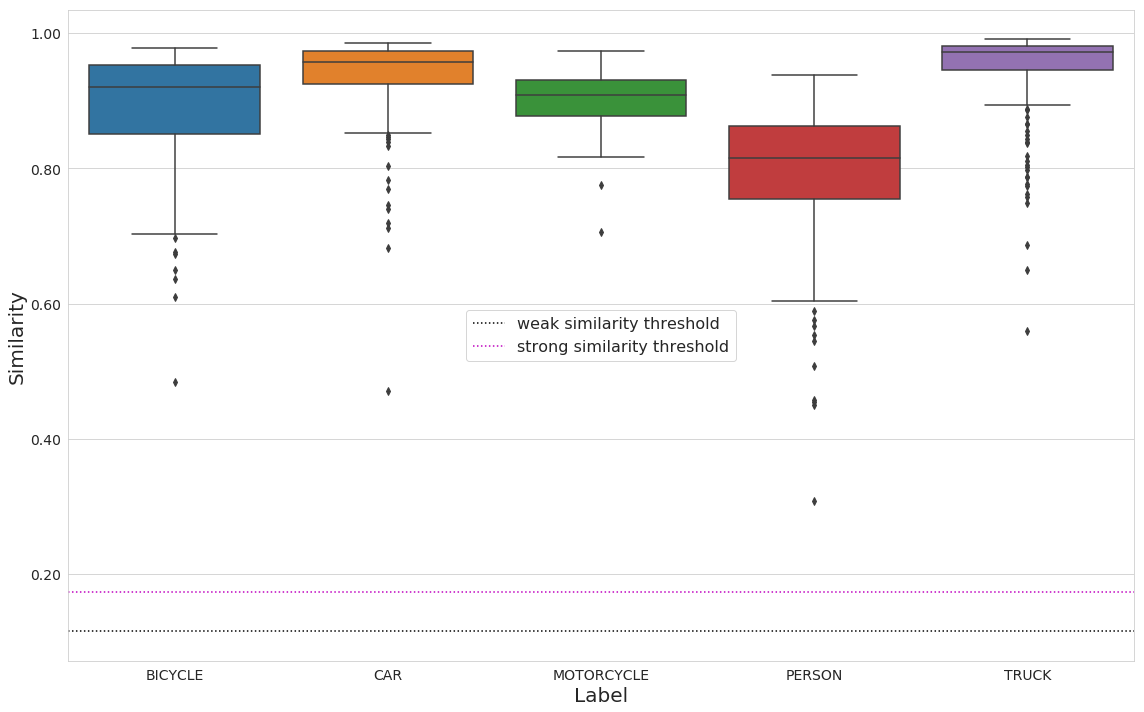

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
ax = sns.boxplot(x='label', y='similarity', data=df)
ax.axhline(2./np.sqrt(300), c='k', ls=':', label='weak similarity threshold')
ax.axhline(3./np.sqrt(300), c='m', ls=':', label='strong similarity threshold')
ax.set_ylabel('Similarity', fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
classes= ['BICYCLE', 'CAR', 'MOTORCYCLE' ,'PERSON', 'TRUCK']
ax.set_xticklabels(classes, fontsize=14)
ax.set_xlabel('Label', fontsize=20)
ax.legend(loc='best', fontsize=16, frameon=True)
plt.tight_layout()
plt.savefig('/home/flo/git/diss/thesis/imgs/Visual_vocab_traffic_participants_similarity_with_representative_vecs.eps', dpi=1200)
plt.show()

In [4]:
hf = h5.File('/media/flo/LACIE_HD/structured_vocabs/traffic_participants_vocab.h5', 'r')

In [5]:
vocab = spa.Vocabulary(dimensions=300)

In [6]:
list(hf.keys())

['classes_visual1', 'vocab_vectors_visual1']

In [7]:
for i in np.arange(5):
    vocab.add(key=classes[i], p=np.array(hf['vocab_vectors_visual1'][i]))

In [8]:
sims = np.zeros((5,5))
for i in np.arange(5):
    for j in np.arange(5):
        sims[i,j] = vocab[classes[i]].compare(vocab[classes[j]])

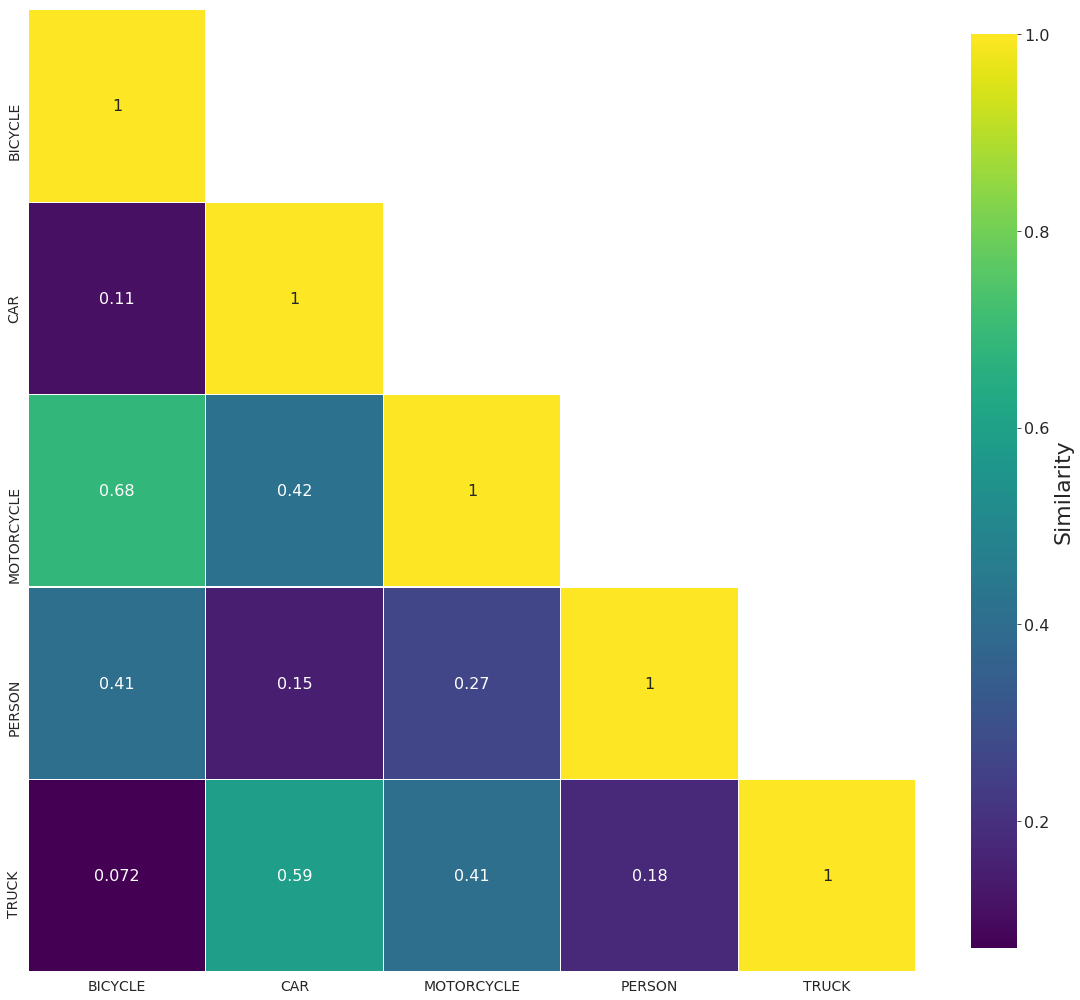

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
mask = np.zeros_like(sims)
mask[np.triu_indices_from(mask, k=1)] = True
fig = plt.figure(figsize=(16,14))
ax = sns.heatmap(sims, mask=mask, annot=True, annot_kws={"size": 16}, 
                 cmap=cm.viridis, linewidths=0.2, 
                 cbar_kws={"label": "Similarity", "shrink":0.95})
ax.figure.axes[-1].yaxis.label.set_size(22)
ax.set_xticklabels(classes, fontsize=14)
ax.set_yticklabels(classes, fontsize=14)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('/home/flo/git/diss/thesis/imgs/visual_vocab_traffic_participants_internal_similarities.eps', dpi=1200)
plt.show()